In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df=pd.read_csv('/content/Fraud.csv')

In [ ]:
!mkdir train
!mkdir test

In [ ]:
print(df)

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1         1   PAYMENT    1864.28  C1666544295       21249.00        19384.72   
2         1  TRANSFER     181.00  C1305486145         181.00            0.00   
3         1  CASH_OUT     181.00   C840083671         181.00            0.00   
4         1   PAYMENT   11668.14  C2048537720       41554.00        29885.86   
...     ...       ...        ...          ...            ...             ...   
56198     9  CASH_OUT   16024.60  C1088493558      442118.00       426093.40   
56199     9   PAYMENT   20502.92   C410885495        3073.00            0.00   
56200     9   CASH_IN  175858.36   C702220078      290164.69       466023.05   
56201     9   PAYMENT    2955.89  C1632500548      466023.05       463067.17   
56202     9    PAYMEN        NaN          NaN            NaN             NaN   

          nameDest  oldbalanceDest  new

In [ ]:
df['isFraud'].isna().sum()

1

In [ ]:
df['isFraud'].isna().dropna()

,isFraud
0,False
1,False
2,False
3,False
4,False
...,...
151794,False
151795,False
151796,False
151797,False


In [ ]:
df.dropna().isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
151794,12,PAYMENT,21278.77,C1003833784,728718.50,707439.73,M2001277538,0.0,0.0,0.0,0.0
151795,12,PAYMENT,7131.13,C988075754,707439.73,700308.60,M1419191344,0.0,0.0,0.0,0.0
151796,12,PAYMENT,2870.84,C1159606163,700308.60,697437.75,M2054942544,0.0,0.0,0.0,0.0
151797,12,PAYMENT,17873.00,C1714697587,697437.75,679564.76,M200223521,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
151793,12,PAYMENT,6266.61,C2121687771,734985.11,728718.50,M1046092014,0.0,0.0,0.0,0.0
151794,12,PAYMENT,21278.77,C1003833784,728718.50,707439.73,M2001277538,0.0,0.0,0.0,0.0
151795,12,PAYMENT,7131.13,C988075754,707439.73,700308.60,M1419191344,0.0,0.0,0.0,0.0
151796,12,PAYMENT,2870.84,C1159606163,700308.60,697437.75,M2054942544,0.0,0.0,0.0,0.0


In [ ]:
count = 0
for value in df['isFraud']:
  if value==1:
    count +=1
  else:
    pass
print(count)

131


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,151667
1.0,131


In [ ]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,151798


In [ ]:
len(df['nameOrig'].unique())

151796

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,151799.000000,1.517990e+05,1.517990e+05,1.517980e+05,1.517980e+05,1.517980e+05,151798.000000,151798.0
mean,9.333902,1.791774e+05,8.879109e+05,9.043402e+05,9.137641e+05,1.180076e+06,0.000863,0.0
std,1.906281,3.401606e+05,2.807531e+06,2.844268e+06,2.384389e+06,2.705635e+06,0.029364,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.111398e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.122687e+04,1.999000e+04,0.000000e+00,3.164400e+04,9.332977e+04,0.000000,0.0
75%,11.000000,2.230398e+05,1.956685e+05,2.262719e+05,6.869059e+05,1.120989e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000,0.0


In [ ]:
!pip install scipy
!pip install seaborn
!pip install sklearn
!pip install matplotlib
!pip install statsmodels
!pip install imblearn
!pip install imbalanced-learn
!pip install mlxtend
!pip install sklearn
!pip install xgboost
!pip install lightgbm
!pip install catboost

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import interp1d


from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import matplotlib.pylab as plt
# from scipy.interpolate import interp
 # interp function was moved to scipy.interpolate
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve,auc

**Highly Imbalanced dataset, SMOTE may be required**

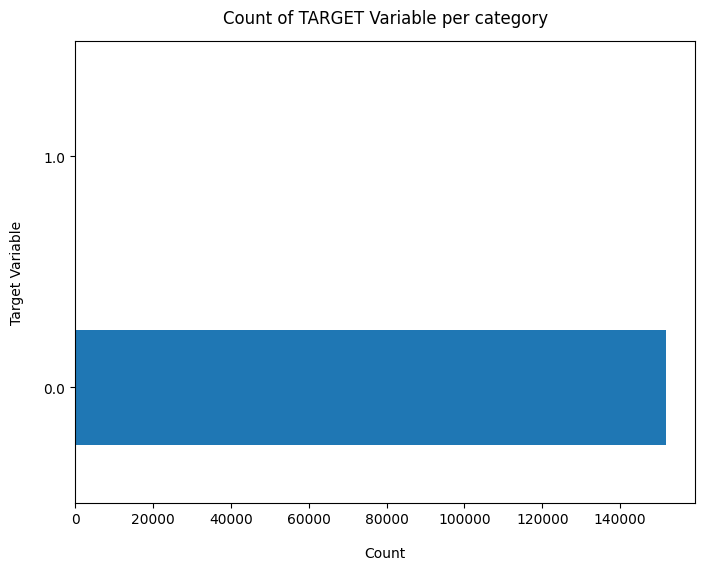

In [ ]:

df['isFraud'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02);

In [ ]:
100*df['isFraud'].value_counts()/len(df['isFraud'])


,count
isFraud,
0.0,99.913043
1.0,0.086298


In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


TypeError: pointplot() got multiple values for argument 'data'

<Figure size 1600x500 with 0 Axes>

In [ ]:
df.columns


In [ ]:
target='isFraud'


In [ ]:

print(target)

In [ ]:
df[df[target]==1].head()


# FEATURE EXTRACTION

In [ ]:
100*df[df[target]==1].newbalanceOrig.value_counts()/len(df[df[target]==1].newbalanceOrig)


In [ ]:
145/len(df[df[target]==1])


In [ ]:
100*df[df[target]==1].newbalanceDest.value_counts()/len(df[df[target]==1].newbalanceDest)


In [ ]:

df.dtypes

In [ ]:
df.type.value_counts()

In [ ]:
100*df[df[target]==1].type.value_counts()/len(df[df[target]==1].type)


In [ ]:
100*df[df[target]==1].isFlaggedFraud.value_counts()/len(df[df[target]==1].isFlaggedFraud)


# KDE PLOTS FOR FEATURES

In [ ]:

Tot = sns.kdeplot(df.amount[(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.amount[(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total amount by fraud')



In [ ]:
Tot = sns.kdeplot(df.oldbalanceOrg[(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.oldbalanceOrg[(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total oldbalanceorigin by fraud')

In [ ]:
Tot = sns.kdeplot(df.newbalanceOrig [(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.newbalanceOrig [(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total newbalanceorigin by fraud')

In [ ]:

Tot = sns.kdeplot(df.oldbalanceDest[(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.oldbalanceDest[(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total oldbalancedestination by fraud')

In [ ]:
Tot = sns.kdeplot(df.newbalanceDest [(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.newbalanceDest [(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total newbalancedestination by fraud')

# FEATURE ENGINEERING

In [ ]:
df['dest_increase'] = (df['newbalanceDest']- df['oldbalanceDest']).values
df['origin_bal_change'] = (df['oldbalanceOrg'] - df['newbalanceOrig']).values


In [ ]:
gg = (df['newbalanceOrig']==0.0) & (df['origin_bal_change']==df['amount'])
df['possible_fraud'] = 0
df.loc[gg,'possible_fraud'] = 1
df[df['possible_fraud']==1].head(10)

In [ ]:
gg1 = (df['dest_increase']==0.0) & (df['amount']>0)
gg2 = gg1 & ((df['dest_increase']!=df['amount']) & (df['isFlaggedFraud']==0) & (df['possible_fraud']==0))
df['possible_fraud2'] = 0
df.loc[gg2,'possible_fraud2'] = 1

In [ ]:
df

In [ ]:
df=df.drop(['step','nameDest','nameOrig'],axis=1)

In [ ]:
df['type'].value_counts()

In [ ]:
new_data = { "CASH_OUT":1,
             "TRANSFER":1,
             "CASH_IN":0,
             "DEBIT":0,
            "PAYMENT":0,


           }

In [ ]:
df['type'] = df['type'].map(new_data)



In [ ]:
df

scaling

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:

scaled = scaler.fit_transform(df)
scaled=pd.DataFrame(scaled,columns=df.columns)

In [ ]:
scaled

In [ ]:
X = scaled.drop('isFraud', axis=1)
y = scaled['isFraud']


In [ ]:

X = X.dropna(subset=['isFlaggedFraud'])


X['isFlaggedFraud'] = X['isFlaggedFraud'].astype(int)


In [ ]:
X['isFlaggedFraud']=X['isFlaggedFraud'].astype(int)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [ ]:
print(X.columns)


In [ ]:
X['possible_fraud']=X['possible_fraud'].astype(int)
# X['possible_fraud2']=X['possible_fraud2'].astype(int)
X['type']=X['type'].astype(int)
y=y.astype(int)


In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [ ]:
vif_data

In [ ]:
X=X.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','dest_increase'],axis=1)

## **Model building**
* LogisticRegression
* RandomForestClassifier

In [ ]:

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X,y ,test_size =0.2,shuffle=True)


In [ ]:
model1=LogisticRegression()

model1.fit(x_train1,y_train1)

In [ ]:

pred_cv1 = model1.predict(x_test1)
accuracy_score(y_test1,pred_cv1)

### **excellent results for minority class**

In [ ]:
print(classification_report(y_test1, pred_cv1, labels=[0,1]))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train1, y_train1)


In [ ]:
pred_cv2 = clf.predict(x_test1)
accuracy_score(y_test1,pred_cv2)

In [ ]:
print(classification_report(y_test1, pred_cv2, labels=[0,1]))


# FEATURE IMPORTANCE

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train1, y_train1)
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train1.columns
mutual_info.sort_values(ascending=False)

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


### **auc curve and confusion matrix**

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test1, pred_cv1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:

def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])



FOR LOGISTIC REGRESSION

In [ ]:

plot_cm(y_test1, pred_cv1)

FOR RANDOMFORESTCLASSIFIER

In [ ]:
plot_cm(y_test1, pred_cv2)

In [ ]:

from sklearn.metrics import auc

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

### **PR Curve**

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test1, pred_cv1)
# calculate scores
lr_f1, lr_auc = f1_score(y_test1, pred_cv1), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Q&A

> QUESTIONS TO ANSWER
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

1. Dataset contains no missing values, but after feature engineering vif of few features was very high so I use VIF to remove them.
2. This will answered by combining all of answers of this question will be answered by following answers.
3. I bascially dropped thew columns which doesnt provide any information gain and have very high VIF ( variance influence factor), apart from that I performed feature engineering and lastly took all the columns which got left.
4. I have provided various metrics, as accuracy is not a good metric for imbalanced dataset , I have provide classification reports which provide precision,recall anf F1 score(recommended for imbalanced dataset).
5. I have performed the process of feature importance by using mututal information,Mutual Information measures the entropy drops under the condition of the target value. by that I found the most imortant fearures are following in decreasing importance or information gain:
* type
* possible_fraud2     
* origin_bal_change   
* possible_fraud       
* amount              
* isFlaggedFraud


6.  **Type**: I performed feature engineering on feature TYPE, what I found was that the proproptions of fraud transactions when looked in terms of unique values in column type (which is basically column        for transaction type) is only given by two types of transaction CASH_OUT (50.11567) TRANSFER (49.88433), what that means is all fraud transactions are  either cash_out or transfer of amount to              different account which makes sense as fraud transaction will be done either taking fraud money out from someone's account or transferring it to diffferent account.
     I mapped 1 to both cash_out and transfer and 0 to other values , so basically I weighted them and give more preference for genuine reason.
    
    **origin_bal_change**: In fraudulent transactions, the origin account is completely emptied out (almost), so this feature provides a unique perspective about fraudlent transactions and its also be seen      by the kernel density plot for newbalanceorigin.
    it also makes sense as no one empty their account during any transaction, empyting account can lead to expiration of the account itself, so it clearly implies their is fraudlent transaction.
    
    **possible_fraud**: this feature again was made during feature engineering, this feature bascially consider those transaction which involve emptying the originaccount balance as we have seen that in         fraudlent transaction this is prominent so I have marked 1 all such transcations.
    
    **possible_fraud2**: this feature takes account the fact that in fraudulent transactions, the newbalance in the destination account does not increase at all, the change is 0 , I have marked all those
    transaction as 1 which are not previosly marked as 1 by possible fraud feature and isFlaggedFraud so that we can gain new information and multicollinearaity remain distant. This can be seen by KDE Plot     clearly.
    
    **amount**: In KDE Plot for amount we can see that when transaction amount increases the number of fraudlent transaction also increases, not only that at bveyond certain amounts (2x10^^) the fraudlent       transaction are significantly higher than non fraud transactions which makes sense as fraudlentr transction usally involve large sums of money.
    
The rest features have no strong reason for their relationships

7. The company should contact the account holder as soon as the transaction amount crosses 30% of their balance in account and should not let them totally empty their account, by that they can significantly    decrease fraudlent transaction.
8. To check the efficiency of step above take, they can first all check the number of fraudlent transaction further they can run a model like this and check the feature importance, if the feature importance of features which were considered during decision making decreasing that means that feature did its work and rest fraudlent transactoin have no significant relationship with that feature and futher they can check other features and take steps accordinly.